
# **Introduction**

A stock is the small chunk of ownership in the company. The stock price of the company reflects the net evaluation of the company and also gives a little insight into its performance. These stocks are traded on exchanges and their prices are constantly changing due to their demand and supply in the market. If a stock is in high demand and low in supply i.e. more people want to buy it and fewer people are willing to sell it then the price for the stock will go up and similarly if the stock is in low demand and high on supply which means people more people are ready to sell it but fewer people are willing to buy it then its prices go down.

The sudden increase in the demand for the stock can be due to various reasons including positive news about the company or an announcement from the company. After a period of time when the demand for the stock vanishes its prices slowly creep down as the investor loses interest in it. These stock prices going up and down is an iterative process and repeated. This volatility of stock makes investors nervous while investing in a company. So to understand the risk associated with it there must be a proper analysis of stock before buying it.

For Model Building I took **Apple Inc.** Share Report from *Jan 1,1980 - Jan 18, 2022*.

# **Description about Apple Inc.**

Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple Pay, a cashless payment service, as well as licenses its intellectual property. The company serves consumers, and small and mid-sized businesses; and the education, enterprise, and government markets. It distributes third-party applications for its products through the App Store. The company also sells its products through its retail and online stores, and direct sales force; and third-party cellular network carriers, wholesalers, retailers, and resellers. Apple Inc. was incorporated in 1977 and is headquartered in Cupertino, California.

For more Information: https://www.apple.com

## **Data description**:
I have downloaded the daily stock prices data from https://finance.yahoo.com/quote/AAPL?p=AAPL. It’s a five-year data capturing Open, High, Low, Close, and Volume

* Open: The price of the stock when the market opens in the morning
* Close: The price of the stock when the market closed in the evening
* High: Highest price the stock reached during that day
* Low: Lowest price the stock is traded on that day
* Volume: The total amount of stocks traded on that day

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import math
warnings.filterwarnings('ignore')


In [20]:
data = pd.read_csv('AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120545,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117924,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112683,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107879,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105695,39827200
...,...,...,...,...,...,...,...
10344,2022-01-10,169.080002,172.500000,168.169998,172.190002,172.190002,106765600
10345,2022-01-11,172.320007,175.179993,170.820007,175.080002,175.080002,76138300
10346,2022-01-12,176.119995,177.179993,174.820007,175.529999,175.529999,74805200
10347,2022-01-13,175.779999,176.619995,171.789993,172.190002,172.190002,84505800


In [21]:
def info(data) :
        # Basic Information about the dataset
        data.info()

        # Dimensions of dataset
        print('Shape of The dataset: ', data.shape)
        print('Total Size of the dataset: ', data.size)
        print('Dimensions of dataset: ', data.ndim)


        # Descriptive Statistics of Numerical Columns
        num_des = pd.DataFrame(data.describe())
        print('\nExporting')
        print('Descriptive Statistical Report for Numerical Columns')
        num_des.to_excel('Statistical Report.xlsx')


        # Quantify the Numerical Columns and Categorical Columns
        num_cols = data.select_dtypes(include = ['int64', 'int32', 'int16','float64', 'float32', 'float16']).columns
        print('\nNumerical Columns: ', num_cols.values)
        print('Number of Numerical Columns in the dataset: ', num_cols.nunique())

        cat_cols = data.select_dtypes(include = ['object', 'category']).columns
        print('\nCategorical Columns: ', cat_cols.values)
        print('Number of Categorical Columns in the dataset: ', cat_cols.nunique())


        # Quantifying Percentage of Missing Values in the dataset
        Null = pd.DataFrame(round(data.isnull().mean() * 100 , 2), columns = ['Percentage'])
        print('\n\nPercentage of Null Values in the dataset: \n',Null)

        # Determining Cardinality
        cardinality = pd.DataFrame(data.nunique(), columns= ['Counts'])
        print('\n\nCardinality: \n', cardinality)

In [22]:
info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10349 entries, 0 to 10348
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10349 non-null  object 
 1   Open       10349 non-null  float64
 2   High       10349 non-null  float64
 3   Low        10349 non-null  float64
 4   Close      10349 non-null  float64
 5   Adj Close  10349 non-null  float64
 6   Volume     10349 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 566.1+ KB
Shape of The dataset:  (10349, 7)
Total Size of the dataset:  72443
Dimensions of dataset:  2

Exporting
Descriptive Statistical Report for Numerical Columns

Numerical Columns:  ['Open' 'High' 'Low' 'Close' 'Adj Close' 'Volume']
Number of Numerical Columns in the dataset:  6

Categorical Columns:  ['Date']
Number of Categorical Columns in the dataset:  1


Percentage of Null Values in the dataset: 
            Percentage
Date              0.0
Open              0.

**Type Casting**

In [23]:
data["Date"] = pd.to_datetime(data['Date'])
data['Date'].dtype

dtype('<M8[ns]')

**Preprocessing**

In [24]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

In [25]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Quarter
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120545,21660800,1981,1,1
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117924,35728000,1981,1,1
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112683,45158400,1981,1,1
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107879,55686400,1981,1,1
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105695,39827200,1981,1,1
...,...,...,...,...,...,...,...,...,...,...
10344,2022-01-10,169.080002,172.500000,168.169998,172.190002,172.190002,106765600,2022,1,1
10345,2022-01-11,172.320007,175.179993,170.820007,175.080002,175.080002,76138300,2022,1,1
10346,2022-01-12,176.119995,177.179993,174.820007,175.529999,175.529999,74805200,2022,1,1
10347,2022-01-13,175.779999,176.619995,171.789993,172.190002,172.190002,84505800,2022,1,1


**Exploratory Data Analysis**

1) Comparison on Opening and Closing Prices of Stocks over a period of time?

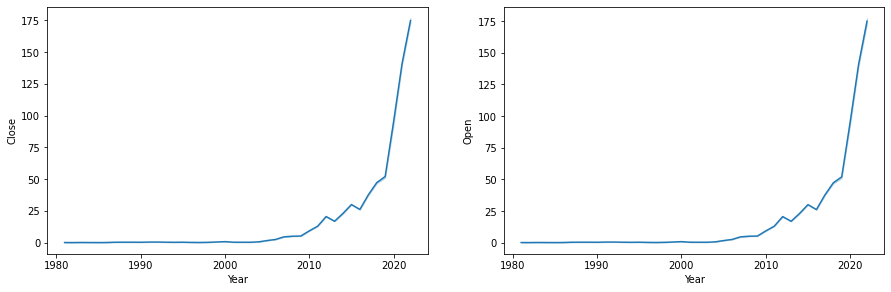

In [26]:
plt.figure(figsize= (15,10))
plt.subplot(2,2,1)
sns.lineplot(data = data, x = 'Year', y = 'Close')
plt.subplot(2,2,2)
sns.lineplot(data = data, x = 'Year', y = 'Open');

2) Spreading of Volumes of Shares over a year?

Text(0.5, 1.0, 'Volume of Stocks Traded over a period')

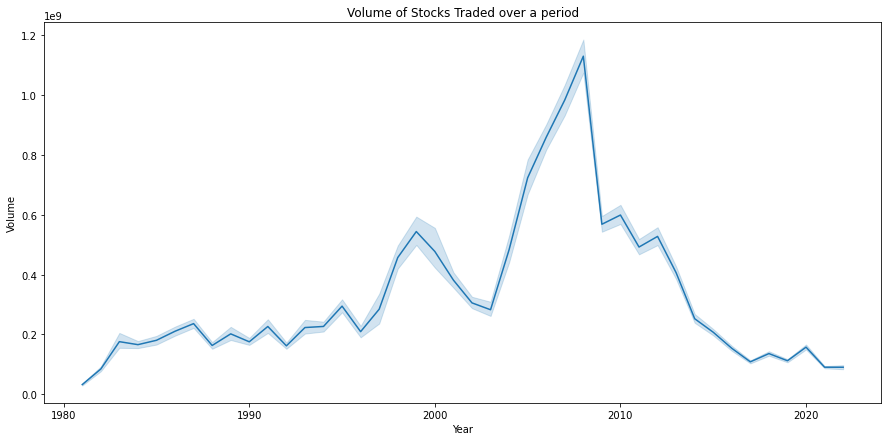

In [27]:
plt.figure(figsize  = (15,7))
sns.lineplot(data = data, x = 'Year', y = 'Volume')
plt.title('Volume of Stocks Traded over a period')

3) Accumulated Volumes over Quarter in Year?


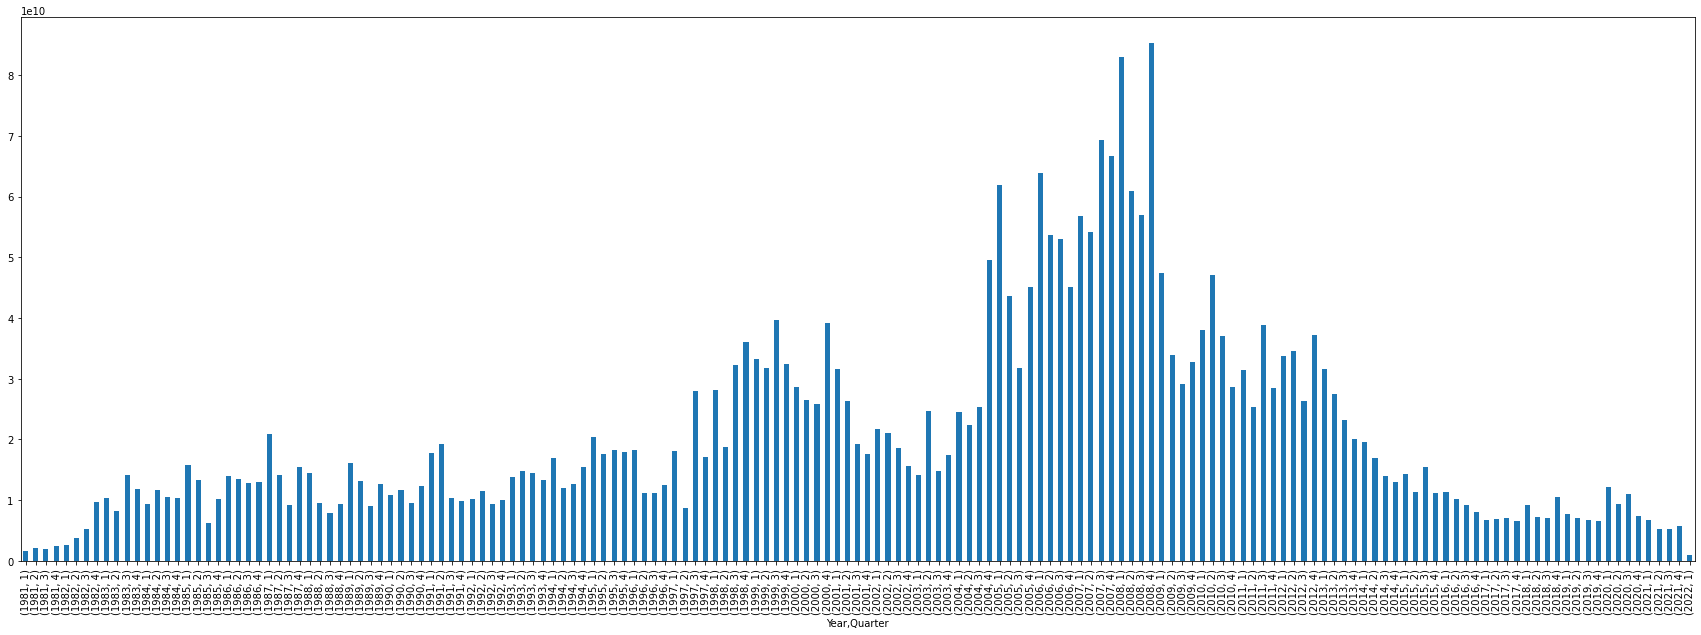

In [28]:
plt.figure(figsize= (30,10))
res = data.groupby(['Year','Quarter'])['Volume'].sum()
res.plot.bar();

4) Analyse the **Apple Market Capitalization**?

*Market Capitalization*:

Market capitalization refers to the total dollar market value of a company's outstanding shares of stock.

Text(0.5, 1.0, 'Trend of Market Capitalization of Apple Inc.')

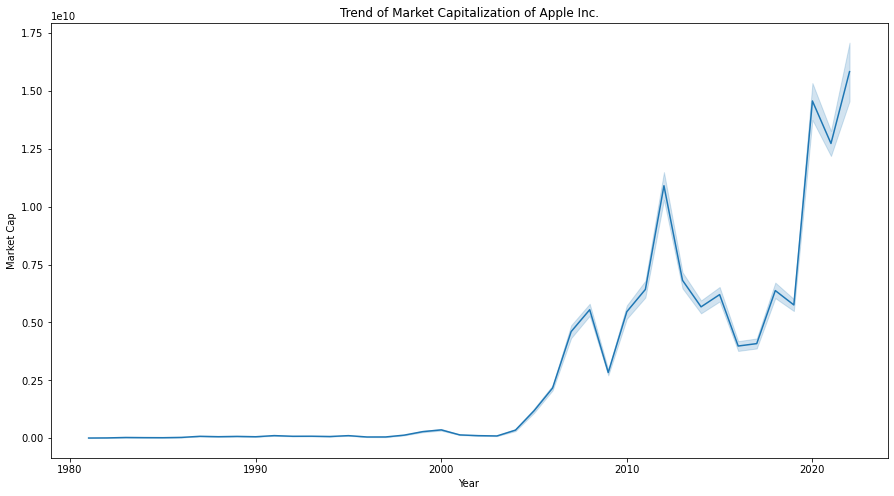

In [29]:
plt.figure(figsize= (15,8))
data['Market Cap'] = data['Open'] * data['Volume']
sns.lineplot(data = data, x = 'Year', y = 'Market Cap')
plt.title('Trend of Market Capitalization of Apple Inc.')

**Moving Average**

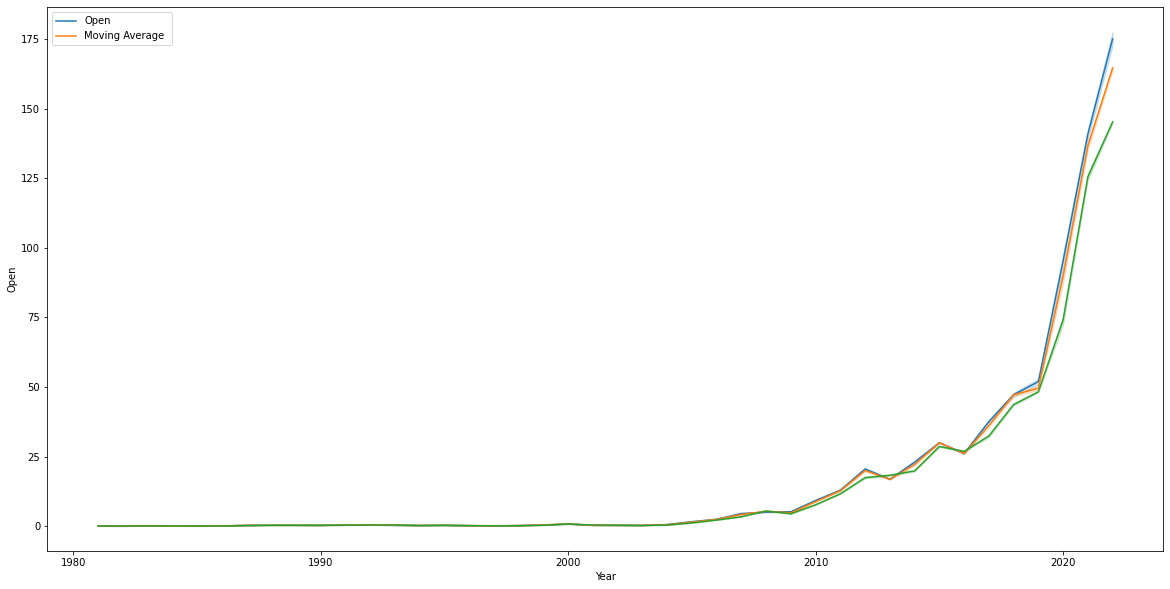

In [30]:
plt.figure(figsize= (20,10))
data['MA50'] = data['Open'].rolling(50).mean()
data['MA200'] = data['Open'].rolling(200).mean()
sns.lineplot(data = data, x = 'Year', y = 'Open', label = 'Open')
sns.lineplot(data = data, x = 'Year', y = 'MA50', label = 'Moving Average ')
sns.lineplot(data = data, x = 'Year', y = 'MA200')
plt.legend();

The Moving Average makes the line smooth by working on abrupt changes by calculating Mean values and showcase the increasing or decreasing trend of stocks price. 

**Percentage Increase in Stock Prices** - Return Deviation

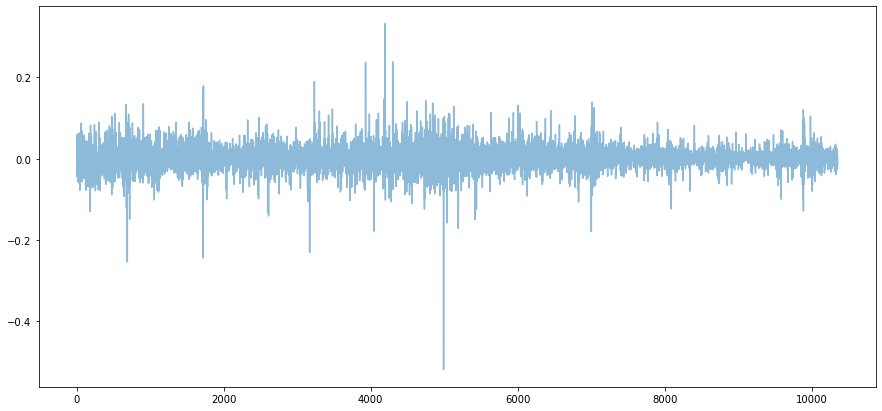

In [31]:
data['Returns'] = (data['Close']/data['Close'].shift(1)) - 1
data['Returns'].plot.line(label = 'Apple', alpha = 0.5, figsize = (15,7));

Logically, our ideal stocks should return as high and stable as possible. Because the deviation is clinging over 0.1 to 0.2 in either ways, so investment won't be lost.

**Feature Engineering**

In [32]:
data['HL_Change'] = (data['High'] - data['Low']) / data['Close'] * 100
data['PCT_Change'] = (data['Close'] - data['Open']) / data['Open'] *100


In [33]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year',
       'Month', 'Quarter', 'Market Cap', 'MA50', 'MA200', 'Returns',
       'HL_Change', 'PCT_Change'],
      dtype='object')

In [34]:
data = data.drop(['MA50', 'MA200', 'Returns', "Market Cap"], axis = 1)

**Splitting of Data**

In [35]:
total_size = len(data)
train_size = math.floor(0.8 * total_size)
train = data.head(train_size)
test = data.tail(len(data) - train_size)

train.shape, test.shape

((8279, 12), (2070, 12))

**AutoCorrelation**

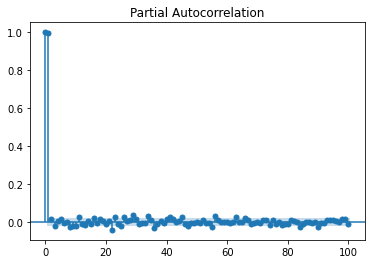

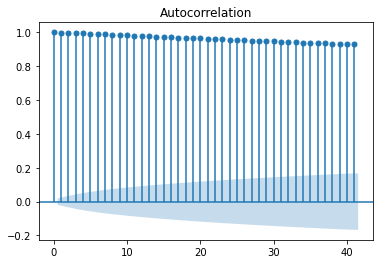

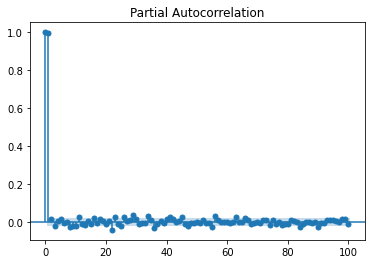

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Adj Close'])
plot_pacf(data['Adj Close'], lags = 100)

#### **Check for Stationary Dataset**

**Augmented Dickey-Fuller test**

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [37]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 6.949550
p-value: 1.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary

**Conclusion** - Not a Stationary Dataset

**Moving Average Technique**

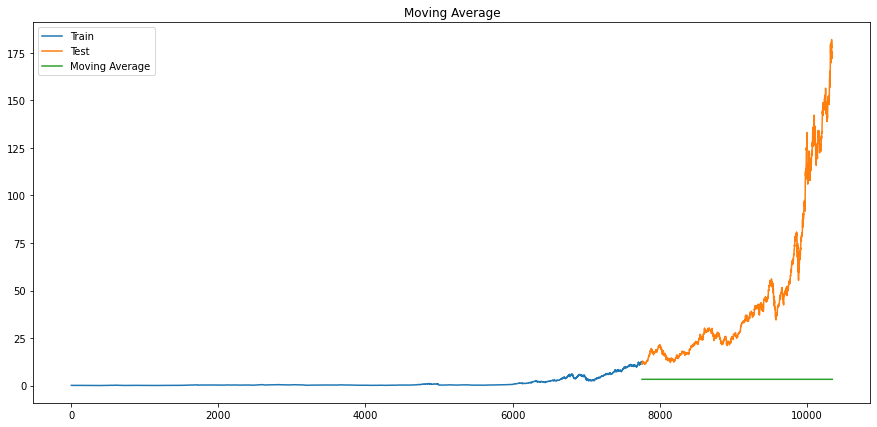

RMSE:  59.19967208553319


In [38]:
import math
from sklearn.metrics import mean_squared_error
def moving_avg_forecast(df,colval, split):
    global y_hat, train, test
    total_size = len(df)
    train_size = math.floor(split*total_size) # 70% of dataset
    train = df.head(train_size)
    test = df.tail(len(df) - train_size)
    dd = np.array(train[colval])
    y_hat = test.copy()
    y_hat['MVAVG'] = train[colval].rolling(len(test)).mean().iloc[-1]
    plt.figure(figsize = (15,7))
    plt.plot(train.index, train[colval], label = 'Train')
    plt.plot(test.index, test[colval], label = 'Test')
    plt.plot(y_hat.index, y_hat['MVAVG'], label = 'Moving Average')
    plt.legend()
    plt.title('Moving Average')
    plt.show()
    rmse = np.sqrt(mean_squared_error(test[colval], y_hat['MVAVG']))
    print('RMSE: ',rmse)
    
moving_avg_forecast(data, 'Adj Close', 0.75)

In [39]:
data = data.drop(['Year', 'Month','Quarter', 'HL_Change', 'PCT_Change'], axis = 1)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.120545,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117924,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112683,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107879,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105695,39827200
...,...,...,...,...,...,...,...
10344,2022-01-10,169.080002,172.500000,168.169998,172.190002,172.190002,106765600
10345,2022-01-11,172.320007,175.179993,170.820007,175.080002,175.080002,76138300
10346,2022-01-12,176.119995,177.179993,174.820007,175.529999,175.529999,74805200
10347,2022-01-13,175.779999,176.619995,171.789993,172.190002,172.190002,84505800


**Naive Approach**

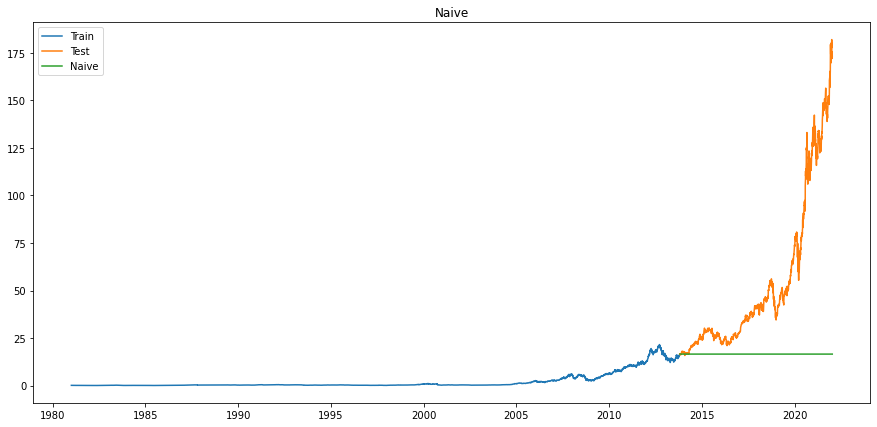

RMSE:  56.140589673592146


In [40]:
import math
from sklearn.metrics import mean_squared_error
def naive_forecast(df,coltime, colval, split):
    global y_hat, train, test
    total_size = len(df)
    train_size = math.floor(split*total_size) # 70% of dataset
    train = df.head(train_size)
    test = df.tail(len(df) - train_size)
    dd = np.array(train[colval])
    last_value = dd[len(dd) - 1]
    y_hat = test.copy()
    y_hat['naive'] = last_value
    plt.figure(figsize = (15,7))
    plt.plot(train[coltime], train[colval], label = 'Train')
    plt.plot(test[coltime], test[colval], label = 'Test')
    plt.plot(y_hat[coltime], y_hat['naive'], label = 'Naive')
    plt.legend()
    plt.title('Naive')
    plt.show()
    rmse = np.sqrt(mean_squared_error(test[colval], y_hat['naive']))
    print('RMSE: ',rmse)
    
naive_forecast(data, 'Date', 'Adj Close', 0.8)

**Simple Exponential Smoothening**

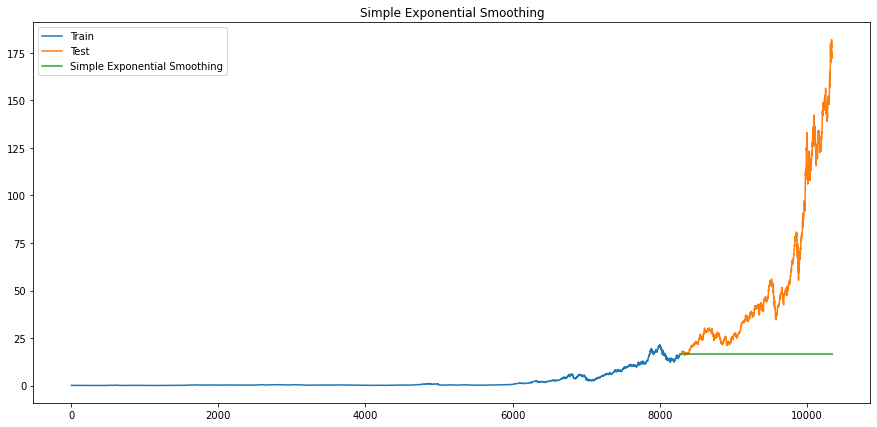

RMSE:  56.12288336493204


In [41]:
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
def ses_forecast(df,colval, split):
    global y_hat, train, test
    total_size = len(df)
    train_size = math.floor(split*total_size) # 70% of dataset
    train = df.head(train_size)
    test = df.tail(len(df) - train_size)
    y_hat = test.copy()
    fit1 = SimpleExpSmoothing(np.array(train[colval])).fit(smoothing_level= 0.6, optimized= False)
    y_hat['SES'] = fit1.forecast(len(test))
    plt.figure(figsize = (15,7))
    plt.plot(train.index, train[colval], label = 'Train')
    plt.plot(test.index, test[colval], label = 'Test')
    plt.plot(y_hat.index, y_hat['SES'], label = 'Simple Exponential Smoothing')
    plt.legend()
    plt.title('Simple Exponential Smoothing')
    plt.show()
    rmse = np.sqrt(mean_squared_error(test[colval], y_hat['SES']))
    print('RMSE: ',rmse)
    
ses_forecast(data, 'Adj Close', 0.8)

**Double Exponential Smoothing**

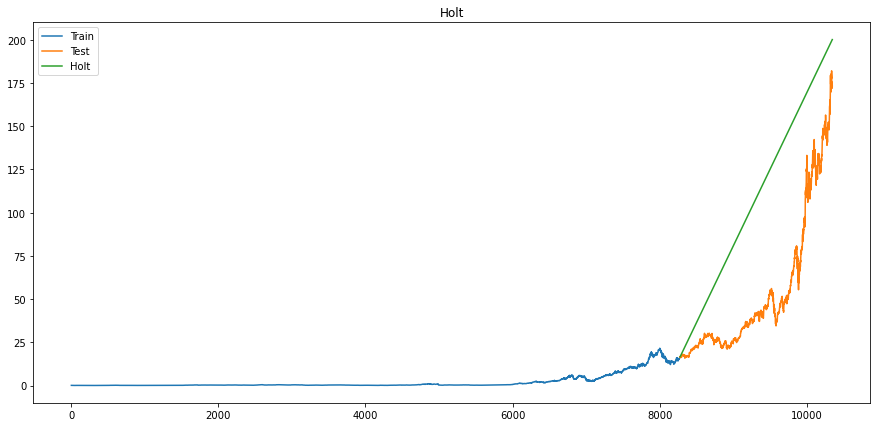

RMSE:  60.0208023612363


In [42]:
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.api import Holt
def holt_forecast(df,colval, split):
    global y_hat, train, test
    total_size = len(df)
    train_size = math.floor(split*total_size) # 70% of dataset
    train = df.head(train_size)
    test = df.tail(len(df) - train_size)
    y_hat = test.copy()
    fit1 = Holt(np.array(train[colval])).fit(smoothing_level= 0.3, smoothing_slope = 0.1)
    y_hat['Holt'] = fit1.forecast(len(test))
    plt.figure(figsize = (15,7))
    plt.plot(train.index, train[colval], label = 'Train')
    plt.plot(test.index, test[colval], label = 'Test')
    plt.plot(y_hat.index, y_hat['Holt'], label = 'Holt')
    plt.legend()
    plt.title('Holt')
    plt.show()
    rmse = np.sqrt(mean_squared_error(test[colval], y_hat['Holt']))
    print('RMSE: ',rmse)
    
holt_forecast(data, 'Adj Close', 0.8)